In [2]:
import numpy as np
from math import sin
from scipy.linalg import eigh
from numpy.linalg import inv
from matplotlib import pyplot as plt

Frequencies in rad/s
[1.53040398e-05 2.57354523e+02 1.05315424e+03 3.96299355e+03]
-o-o-o-o-o-o-
Frequencies in Hz
[2.43571359e-06 4.09592444e+01 1.67614703e+02 6.30730013e+02]
-o-o-o-o-o-o-
Eigenvectors
[[-5.62041717e+00  8.63404430e+00  4.64352767e+00 -4.03395755e-01]
 [-5.62041717e+00  6.30612677e+00 -1.63227681e+01  2.53875794e+01]
 [-5.62041717e+00  5.75447365e+00 -1.87839573e+01 -1.47506661e+01]
 [-5.62041717e+00 -3.90749500e+00  4.64853779e-01  2.52001217e-02]]
-o-o-o-o-o-o-
First omega:  1.5304039817600234e-05
Second omega:  257.35452287856776
Third omega:  1053.1542410306902
Third omega:  3962.993552656273
-o-o-o-o-o-o-
Alpha2 equals:  0.730379246388404
-o-o-o-o-o-o-
Alpha3 equals:  0.6664864633591695
-o-o-o-o-o-o-
Alpha4 equals:  -0.45256832883220877
-o-o-o-o-o-o-
T1 equals:  517.9953918385983
T2 equals:  567.2401277335438
T3 equals:  636.7421767568943
T4 equals:  -1.3415046851150692e-11


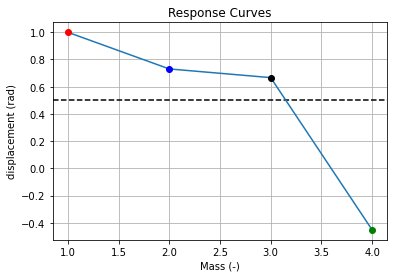

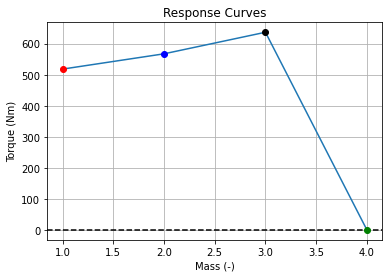

In [3]:
#insert Input variables

m = 0.007821 #kgm^2
m2 = 0.001018
m3 = 0.0015745
m4 = 0.021243

k1 = 1.9212e3 #Nm/rad
k2 = 8.878e3
k3 = 5.69e2

omega = 160.8062 #rad/s
c1 = 0.00 #nms/rad

c2 = 0.00
c3 = 0.00
F0 =0.000 #Nm

dof = 4

#Assemblbe Matrices

K = np.array([[k1,-k1, 0, 0],[-k1,k1+k2,-k2,0],[0, -k2,k2+k3,-k3],[0, 0, -k3, k3]])
C = np.array([[c1,-c1,0, 0],[-c2,c1+c2,-c2,0],[0,-c2,c2+c3, -c3],[0,0,-c3,c3]])
M = np.array([[m, 0, 0, 0],[0, m2, 0, 0],[0, 0, m3,0],[0,0,0,m4]])
I = np.identity(dof)

A = np.zeros((2*dof, 2*dof))
B = np.zeros((2*dof, 2*dof))
Y = np.zeros((2*dof, 1))
F = np.zeros((2*dof, 1))

A[dof:2*dof, dof:2*dof] = M
A[0:dof, 0:dof] = I
B[dof:2*dof, 0:dof] = K
B[0:dof, dof:2*dof] = -I
B[dof:2*dof,dof:2*dof] = C

#Evaluate eigenfrequencies

evals, evecs = eigh(K,M)
frequencies = np.sqrt(evals) #rad/s
frequencies_hz = frequencies/(2*np.pi) #Hz
#c_crit = 2 * np.sqrt(M.dot*K.dot)

#Create Output and Plots

print("Frequencies in rad/s")
print(frequencies)
print("-o-o-o-o-o-o-")
print("Frequencies in Hz")
print(frequencies_hz)
print("-o-o-o-o-o-o-")
print("Eigenvectors")
print(evecs)
omega_1 = frequencies[0]
omega_2 = frequencies[1]
omega_3 = frequencies[2]
omega_4 = frequencies[3]
print("-o-o-o-o-o-o-")
print("First omega: ", omega_1)
print("Second omega: ", omega_2)
print("Third omega: ", omega_3)
print("Third omega: ", omega_4)
alpha1 = 1 #init displacement of Inertia 1 set to 1 as reference

#FIRST MODE
alpha2 = alpha1 - ((omega_2**2)/k1) * m * alpha1
alpha3 = alpha2 - ((omega_2**2)/k2) * (m * alpha1 + m2 * alpha2)
alpha4 = alpha3 - ((omega_2**2)/k3) * (m * alpha1 + m2 * alpha2 + m3 * alpha3)
print("-o-o-o-o-o-o-")
print("Alpha2 equals: ", alpha2)
print("-o-o-o-o-o-o-")
print("Alpha3 equals: ", alpha3)
print("-o-o-o-o-o-o-")
print("Alpha4 equals: ", alpha4)
print("-o-o-o-o-o-o-")
#calculate the Torques
T1 = m * omega_2**2*alpha1
T2 = T1 + (m2) * alpha2 * omega_2**2
T3 = T2 + (m3) * alpha3 * omega_2**2
T4 = T3 + (m4) * alpha4 * omega_2**2

print("T1 equals: ", T1)
print("T2 equals: ", T2)
print("T3 equals: ", T3)
print("T4 equals: ", T4)


#PLOT FIRST MODE
Masses_Values = [1, 2, 3, 4]
alpha_Values = [alpha1, alpha2, alpha3, alpha4]
Torque_Values = [T1, T2, T3, T4]

plt.figure(1)
plt.axhline(y=0.5, color='black', linestyle='--')
plt.plot(Masses_Values, alpha_Values)
plt.plot(1,alpha1, 'o', color='red')
plt.plot(2,alpha2, 'o', color='blue')
plt.plot(3,alpha3, 'o', color='black')
plt.plot(4,alpha4, 'o', color='green')
plt.grid()

plt.xlabel('Mass (-)')
plt.ylabel('displacement (rad)')
plt.title('Response Curves')
#plt.legend(['m1','m2','m3','m4'], loc='lower right')
plt.show()

plt.figure(2)
plt.axhline(y=0.5, color='black', linestyle='--')
plt.plot(Masses_Values, Torque_Values)
plt.plot(1,T1, 'o', color='red')
plt.plot(2,T2, 'o', color='blue')
plt.plot(3,T3, 'o', color='black')
plt.plot(4,T4, 'o', color='green')
plt.grid()

plt.xlabel('Mass (-)')
plt.ylabel('Torque (Nm)')
plt.title('Response Curves')
#plt.legend(['m1','m2','m3','m4'], loc='lower right')
plt.show()

#SECOND MODE


#